In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats 
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, mannwhitneyu, f_oneway


from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split


# Q.1 Read the dataset and drop column - 'Unnamed: 0'

In [3]:
df = pd.read_csv(r"C:\Users\Naina Singam\OneDrive\Desktop\Data Science\Data Mining\EXAM\wheat_seeds.csv")
df.head()

,Unnamed: 0,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove length,wheat type
0,0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove length,wheat type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Q.2 Removing hight collinear features 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel length          210 non-null    float64
 4   kernel width           210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   kernel groove length   210 non-null    float64
 7   wheat type             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


### considering wheat type as target

In [7]:
features = df.drop(columns= ['wheat type'])
features.head()

,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [10]:
features.corr()

,area,perimeter,compactness,kernel length,kernel width,asymmetry coefficient,kernel groove length
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
kernel length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
kernel width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
kernel groove length,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [46]:
df_corr = features.corr().abs()

threshold = 0.75

heigh_corr_pairs = np.where(df_corr > threshold)

heigh_corr_pairs = [
(features.columns[i], 
 features.columns[j]) for i,j in  
zip(*heigh_corr_pairs) if i != j and  
    i < j ]
 
print('Heigh correlation pair:', heigh_corr_pairs)

drop_features = set()
for (feature1, feature2) in heigh_corr_pairs:
    drop_features.add(feature1)
    
print('Features to drop:', drop_features)

df_remaining= df.drop(columns=drop_features)

Heigh correlation pair: [('area', 'perimeter'), ('area', 'kernel length'), ('area', 'kernel width'), ('area', 'kernel groove length'), ('perimeter', 'kernel length'), ('perimeter', 'kernel width'), ('perimeter', 'kernel groove length'), ('compactness', 'kernel width'), ('kernel length', 'kernel width'), ('kernel length', 'kernel groove length')]
Features to drop: {'perimeter', 'compactness', 'area', 'kernel length'}


In [42]:
heigh_corr_pairs

[('area', 'perimeter'),
 ('area', 'kernel length'),
 ('area', 'kernel width'),
 ('area', 'kernel groove length'),
 ('perimeter', 'kernel length'),
 ('perimeter', 'kernel width'),
 ('perimeter', 'kernel groove length'),
 ('compactness', 'kernel width'),
 ('kernel length', 'kernel width'),
 ('kernel length', 'kernel groove length')]

In [47]:
drop_features

{'area', 'compactness', 'kernel length', 'perimeter'}

In [49]:
df_remaining.head()

,kernel width,asymmetry coefficient,kernel groove length,wheat type
0,3.312,2.221,5.220,1
1,3.333,1.018,4.956,1
2,3.337,2.699,4.825,1
3,3.379,2.259,4.805,1
4,3.562,1.355,5.175,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel length          210 non-null    float64
 4   kernel width           210 non-null    float64
 5   asymmetry coefficient  210 non-null    float64
 6   kernel groove length   210 non-null    float64
 7   wheat type             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


# Q.3 Visualize the relation between predictor and classes of target:

In [73]:
y = df_remaining['wheat type']
x = df_remaining.drop(columns= ['wheat type'])

In [58]:
df_remaining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kernel width           210 non-null    float64
 1   asymmetry coefficient  210 non-null    float64
 2   kernel groove length   210 non-null    float64
 3   wheat type             210 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.7 KB


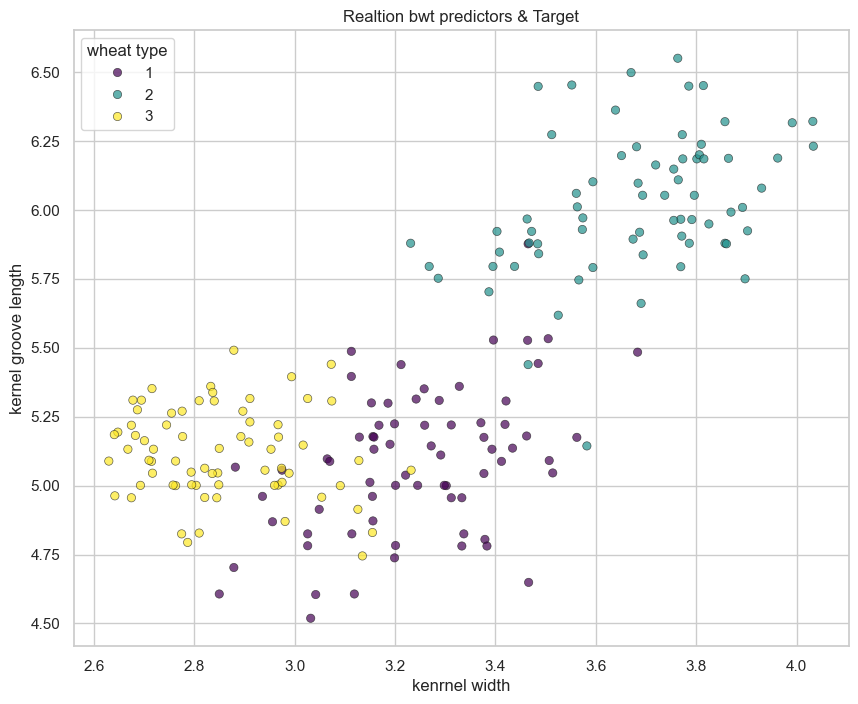

In [60]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_remaining, x='kernel width', y='kernel groove length', hue='wheat type', palette='viridis', edgecolor='k', alpha=0.7)

plt.xlabel('kenrnel width')
plt.ylabel('kernel groove length')
plt.title('Realtion bwt predictors & Target')

plt.show()

# Q.4 Data PreProcessing:

### Splitting data

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22)

In [76]:
x_train.head()

,kernel width,asymmetry coefficient,kernel groove length
61,2.879,2.269,4.703
18,3.466,1.767,4.649
206,2.795,4.325,5.003
78,3.639,5.064,6.362
204,2.960,3.919,5.001


In [77]:
x_test.head()

,kernel width,asymmetry coefficient,kernel groove length
20,3.129,3.072,5.176
49,3.258,2.129,5.351
114,3.991,4.677,6.316
32,3.186,3.920,5.299
75,3.438,4.920,5.795


### Standardazation:

In [69]:
scaler = StandardScaler()

In [78]:
x_train_scaled = scaler.fit_transform(x_train)

In [79]:
x_test_scaled = scaler.transform(x_test)

In [80]:
type(x_train_scaled)

numpy.ndarray

# Q.5 Logistic Regression - model, y_pred, accuracy score, classification report

In [85]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=23)

In [86]:
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=23)

In [88]:
y_pred = model.predict(x_test_scaled)

In [104]:
y_pred

array([1, 1, 2, 1, 2, 3, 3, 1, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 3, 1, 3,
       1, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 2, 2, 3, 2, 3],
      dtype=int64)

In [89]:
accuracyScore = accuracy_score(y_test, y_pred)

In [90]:
accuracyScore

0.9523809523809523

In [116]:
print('\nclassification Report:\n', classification_report(y_test, y_pred))


classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.93      0.97        15
           3       1.00      0.93      0.97        15

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42



# Q.6 Linear Discriminante Analysis:

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [101]:
model2 = LinearDiscriminantAnalysis()

In [102]:
model2.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [106]:
y_pred2 = model2.predict(x_test_scaled)

In [107]:
accuracy2 = accuracy_score(y_test, y_pred2)

In [108]:
accuracy2

0.9523809523809523

In [109]:
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n           1       0.86      1.00      0.92        12\n           2       1.00      0.93      0.97        15\n           3       1.00      0.93      0.97        15\n\n    accuracy                           0.95        42\n   macro avg       0.95      0.96      0.95        42\nweighted avg       0.96      0.95      0.95        42\n'

In [115]:
print('\nClassification report for Linear Discrimination Analysis:\n' ,
      classification_report(y_test, y_pred2))


Classification report for Linear Discrimination Analysis:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       1.00      0.93      0.97        15
           3       1.00      0.93      0.97        15

    accuracy                           0.95        42
   macro avg       0.95      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

